In [663]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
%matplotlib inline

# INWARD REMITTANCES (receiving, incoming)

In [535]:
inrem = pd.read_excel('data/inward_remit.xlsx')
inrem.sample(5)

,Migrant remittance inflows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021e,Remittances as a share of GDP in 2021e (%)
188,Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,381.930784,389.484432,387.768413,402.531458,403.305722,412.910078,433.498219,409.138394,405.865286,0.586189
177,Sri Lanka,152.000000,230.0,289.0,295.0,301.000000,292.0,326.00,350.00,358.00,...,6422.186627,7036.326551,6999.731475,7261.851525,7190.296015,7043.039552,6748.702044,7140.414362,6700,8.293619
136,Netherlands,604.686163,556.0,656.0,567.0,492.711277,502.0,626.00,754.00,814.00,...,1618.625741,1482.635750,2298.091259,2159.875374,2226.489767,2476.207924,2257.581131,2358.923353,2668.456,0.264843
79,Guinea,NaN,NaN,NaN,NaN,NaN,NaN,0.07,0.07,26.71,...,93.010000,121.425853,130.582308,52.170781,44.660000,28.430000,158.130000,22.530000,23,0.137527
180,St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [639]:
inrem = inrem[:216]
inrem = inrem[:216]
inrem = inrem.dropna(how='all')
inrem0 = inrem.replace(np.nan, 0)
inrem0 = inrem0.rename(columns={"Migrant remittance inflows (US$ million)": "Inflow Country", "Remittances as a share of GDP in 2021e (%)": "remit_gdp"}).set_index('Inflow Country').replace(' ', np.nan)
# rename country column, rename %GDP column, set country column as index, replace empty value with Nan
inrem0['total_rem'] = inrem0.sum(axis=1)
# add column for aggregate remittances

In [640]:
inrem0.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
Inflow Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,627.710802,3.117356,6458.398367
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1600.000000,9.540847,31937.846673
Algeria,406.0,447.0,507.0,392.0,329.0,313.0,358.0,487.0,379.0,345.0,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1.073850,21545.679823
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Countries RECEIVING the most remittances

In [641]:
inrem_countries = inrem0.sort_values('total_rem', ascending=False)[2:]
inrem_countries = inrem_countries.drop('remit_gdp', axis=1).drop('total_rem', axis=1)
inrem_countries.head(5)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021e
Inflow Country,,,,,,,,,,,,,,,,,,,,,
India,2761.280685,2301.890115,2621.913836,2662.479622,2293.065837,2472.285487,2243.01388,2663.469748,2316.724191,2609.857302,...,68820.517838,69970.360847,70388.642797,68909.693353,62744.364090,68967.175500,78790.170929,83332.078002,83149.172934,87000.000000
China,0.000000,0.000000,616.000000,542.000000,403.000000,271.000000,407.00000,166.000000,129.000000,76.000000,...,57986.598422,59491.287194,62332.342308,63937.646592,60999.999488,63875.674112,67413.592064,68398.475114,59506.673349,53000.000000
Mexico,1039.000000,1220.000000,1226.000000,1391.000000,1564.000000,1619.000000,1771.00000,1987.000000,2442.000000,2790.000000,...,23208.649190,23188.811955,24802.081325,26233.171803,28690.957406,32270.507679,35768.416627,39021.789685,42878.274907,52742.962524
Philippines,626.000000,800.000000,1049.000000,1124.000000,718.000000,806.000000,861.00000,1020.000000,1262.000000,1360.000000,...,24609.679613,26716.840269,28690.797896,29799.395700,31141.973475,32809.770434,33808.967986,35167.471832,34913.342999,36240.000000
France,1441.000000,1279.000000,1342.000000,1279.000000,1262.000000,1391.000000,2022.00000,2469.000000,3424.000000,3221.000000,...,22666.366759,24412.282153,25358.374728,24066.989837,24042.348847,24884.547856,26878.780498,26173.645645,25141.879667,27161.082269


### Top 10 Remittance Receiving Countries

Top 10 Receiving Countries are: Index(['India', 'China', 'Mexico', 'Philippines', 'France', 'Egypt, Arab Rep.',
       'Nigeria', 'Germany', 'Pakistan', 'Bangladesh'],
      dtype='object', name='Inflow Country')


<AxesSubplot:title={'center':'Countries Receiving the Most Remit. Overall'}, xlabel='Inflow Country', ylabel='Total Remittances (1e12)'>

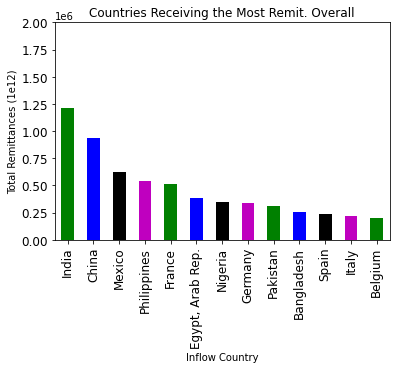

In [642]:
print('Top 10 Receiving Countries are:', (inrem_countries.index[:10]))
plt.axes(title='Countries Receiving the Most Remit. Overall', xlabel=inrem0.index.name, ylabel='Total Remittances (1e12)', ylim=(0,2000000))

inrem0.sort_values('total_rem', ascending=False).total_rem[2:15].plot(kind='bar', color=['g','b','k','m'], fontsize=12)

### Top Remittance Receivers (1-5, 6-10, 11-15)

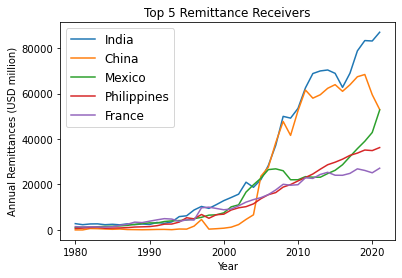

In [7]:
plt.axes(title='Top 5 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best', fontsize=12)

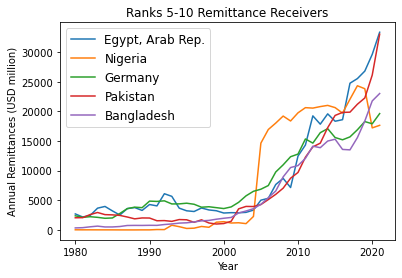

In [8]:
plt.axes(title='Ranks 5-10 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5,10):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best', fontsize=12)

In [9]:
plt.axes(title='Top 15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(10, 15):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best')
plt.close()    # close fig

### Top 20 Remittance Receivers

In [10]:
plt.axes(title='Top 15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(10, 15):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best')
plt.close()    # close fig

In [643]:
inrem1 = inrem0.sort_values('total_rem', ascending=False)
inrem1 = inrem1[2:]
inrem1['total_rem'].plot(x='Inflow Country', y='total_rem', kind='bar')
plt.close()    # close fig

# Percent of GDP from Remittances (top 10)

In [617]:
pd.to_numeric(inrem1.remit_gdp)
top_gdp = inrem1.sort_values('remit_gdp', ascending=False)
top_gdp.insert(42,'pct_gdp_2021e', value=top_gdp.remit_gdp)
top_gdp = top_gdp.style.format({'pct_gdp_2021e': {:,.2f%}})
top_gdp
# trying to format pct column with % sign

SyntaxError: invalid syntax (3773526334.py, line 4)

In [604]:
top_gdp.insert?

<AxesSubplot:title={'center':'Percent of GDP from Remittances (Top 10)'}, xlabel='Inflow Country', ylabel='% GDP from Remittances (2021e)'>

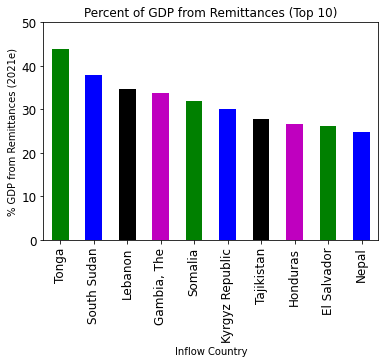

In [618]:
pd.to_numeric(inrem1.remit_gdp)
inrem1 = inrem1.sort_values('remit_gdp', ascending=False)
inrem1['pct_gdp'] = inrem1.remit_gdp / 100
inrem1.remit_gdp.head(10).plot(kind='bar', color=['g','b','k','m'], title='Percent of GDP from Remittances (Top 10)', xlabel='Inflow Country', ylabel='% GDP from Remittances (2021e)', ylim=(0,50), fontsize=12)

In [14]:
foo = inrem0.sort_values('remit_gdp', ascending=False).head(10)
foo = pd.DataFrame(foo.loc[:,'remit_gdp'])
foo = foo.reset_index()    # creating clean x and y columns
foo

,Inflow Country,remit_gdp
0,Tonga,43.924772
1,South Sudan,37.879252
2,Lebanon,34.789036
3,"Gambia, The",33.751224
4,Somalia,31.987463
5,Kyrgyz Republic,30.061350
6,Tajikistan,27.764067
7,Honduras,26.590693
8,El Salvador,26.249955
9,Nepal,24.806654


In [15]:
foo.plot(x='Inflow Country', y='remit_gdp', kind='area')
plt.close()    # close fig

### Top 20 Countries with Remittance as GDP

In [16]:
inrem1.sort_values('remit_gdp', ascending=False).remit_gdp[:20].plot(kind='bar', color=['g','b','k','m'])
plt.close()    # close fig

# OUTWARD REMITTANCES (sending, outgoing)

In [619]:
outrem = pd.read_excel('data/outward_remit.xlsx')
outrem.sample(10)
outrem = outrem[:215]
outrem = outrem.dropna(how='all')
outrem0 = outrem.replace(np.nan, 0)
outrem0['total_rem'] = outrem0.sum(axis=1)
outrem0.sample(5)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_18546/3276991820.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outrem0['total_rem'] = outrem0.sum(axis=1)


,Outward remittance flows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
124,Mauritius,1.561627,1.342801,0.919747,1.110523,0.797082,0.841834,1.113887,1.785962,1.116260,...,8.187835,8.300000,700.782847,599.739064,599.031732,581.452823,747.332851,822.789627,691.477555,4883.706626
153,Poland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1538.000000,1579.000000,2183.000000,2574.000000,3732.000000,6344.000000,7501.000000,8007.000000,7915.000000,52170.000000
71,Georgia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,86.732443,87.714488,86.131110,95.862423,100.492400,122.154262,151.149587,169.883742,76.894986,1454.265647
168,Singapore,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
87,India,29.241802,15.402513,13.516845,39.727379,27.499766,30.896383,42.055765,65.468296,93.125844,...,4963.082154,6431.771261,6221.785953,4882.832496,5622.636935,6958.929628,6781.570847,7531.590150,7010.825359,83815.791299


# Countries SENDING the most remittances

In [620]:
send_countries = outrem0.rename(columns={'Outward remittance flows (US$ million)': 'outflow_country'})
send_countries.outflow_country.iloc[0]    # missing replace Nan label with 'World' code
send_countries = send_countries.set_index('outflow_country').sort_values('total_rem',ascending=False)[1:]
send_countries.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
outflow_country,,,,,,,,,,,,,,,,,,,,,
United States,1360.0,4720.0,5140.0,5450.0,5990.0,6330.0,8660.0,8810.0,9010.0,10220.0,...,52371.000000,55003.000000,57239.000000,60719.000000,62870.000000,64114.000000,66836.000000,71372.000000,69918.000000,1.399133e+06
Saudi Arabia,4090.0,5350.0,5350.0,5240.0,5280.0,5200.0,4800.0,4930.0,6500.0,8530.0,...,29492.573333,34984.186667,36924.240000,38787.368000,37843.205333,36118.961653,33881.511795,31197.048533,34595.847461,7.422887e+05
Switzerland,2343.0,2330.0,2759.0,2688.0,2475.0,2509.0,3780.0,5040.0,5760.0,6110.0,...,23738.994076,25337.903098,26816.952603,26031.157291,26050.038249,26936.091305,27721.355447,28390.490905,29403.688397,5.132056e+05
Germany,5826.0,4794.0,4481.0,4291.0,4042.0,3601.0,4632.0,5534.0,5872.0,5485.0,...,15581.428609,19976.705775,20084.390152,18248.805576,19348.107340,21699.115805,24351.171161,23935.924317,22024.495026,4.792461e+05
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14398.000000,17933.000000,19280.000000,40701.974132,43774.812798,44752.620830,46084.955752,44976.174268,43240.299523,4.075957e+05
Russian Federation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31647.700000,37216.680000,32640.360000,19688.840000,16244.420000,20610.140000,22308.420000,22217.240000,16872.180000,3.846105e+05
France,5070.0,4670.0,4340.0,4110.0,3840.0,4170.0,5150.0,5760.0,6393.0,5571.0,...,12561.160243,13424.774110,13729.849894,12791.549841,13284.455662,13798.960223,15022.558190,15059.012742,14632.716778,3.440113e+05
Kuwait,692.0,689.0,875.0,865.0,963.0,1040.0,1080.0,1100.0,1180.0,1280.0,...,15459.199374,17711.480681,18128.476350,15202.536401,15287.570250,13760.108803,14346.861711,18855.161641,17357.178323,2.404433e+05
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1581.0,1624.0,1735.0,...,10077.435197,10528.125662,11571.027572,10705.712114,10190.899107,9801.235337,10410.041124,10360.300797,9382.380085,2.236567e+05


### Top 10 Remittance Sending Countries

<AxesSubplot:xlabel='Sending Country', ylabel='Total Remittances (USD 1e12)'>

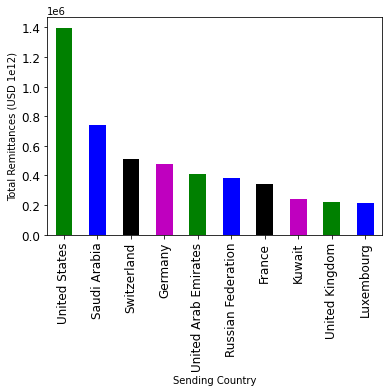

In [621]:
send_countries.total_rem.head(10).plot(kind='bar', color=['g','b','k','m'], fontsize=12, xlabel='Sending Country', ylabel='Total Remittances (USD 1e12)')

### Top SENDERS (1-5), (6-10), (11-15)

In [622]:
send_countries = send_countries.drop('total_rem', axis=1)
# dropping aggregate column so it doesn't create outlier in trendline

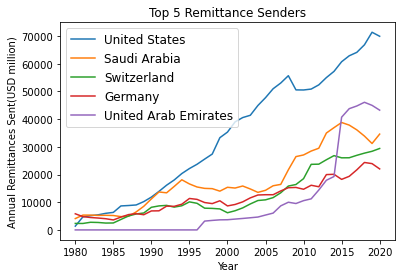

In [623]:
plt.axes(title='Top 5 Remittance Senders', xlabel='Year', ylabel='Annual Remittances Sent(USD million)')
for i in range(5):
    send_countries.iloc[i].plot()
plt.legend(loc='best', fontsize=12)

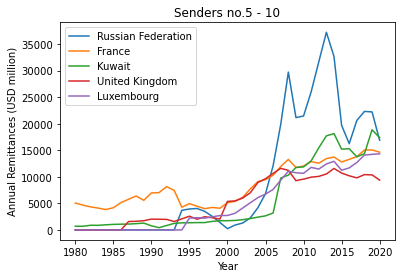

In [624]:
plt.axes(title='Ranks 5-10 Remittance Senders', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5,10):
    send_countries.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.5 - 10')

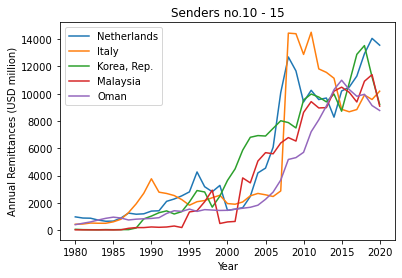

In [625]:
plt.axes(title='Ranks 11-15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(10,15):
    send_countries.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.10 - 15')
    

In [626]:
plt.close('all')

In [627]:
import geonamescache
import ast
gc = geonamescache.GeonamesCache()
countries = pd.DataFrame(gc.get_countries()).T
continents = pd.DataFrame(gc.get_continents()).T
inrem0

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
inflow_country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,627.710802,3.117356,6.458398e+03
Albania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1600.000000,9.540847,3.193785e+04
Algeria,406.000000,447.000000,507.000000,392.000000,329.000000,313.000000,358.000000,487.000000,379.000000,345.000000,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1.073850,2.154568e+04
American Samoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yemen, Rep.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3350.500000,3350.500000,3770.584000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,4.441024e+04
Zambia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.300302,47.046538,38.464441,93.644095,106.965626,98.259121,134.864832,141.608073,0.652602,1.300623e+03
Zimbabwe,16.891617,28.294628,32.895335,19.556181,3.806287,0.619641,0.785055,1.143026,1.382946,0.712249,...,735.000000,790.400000,750.300000,1013.367658,897.902104,921.726525,1209.718045,1354.884210,5.253322,1.179425e+04


#### not useful code
file = open('data/iso3166.json')
file = file.read()
iso3166 = ast.literal_eval(file)

diction = pd.DataFrame(pd.Series(iso3166)).rename(columns={0:'country'})
diction = pd.DataFrame(diction['country'].str.lower())
diction = pd.DataFrame(diction['country'].str.title())
inrem0

# Global / Regional Remittance INFLOWS Analysis

In [649]:
continents = continents.rename(columns={'continentCode': 'continentcode'})
# cleaning up imported column to merge on so it matches
mapp = pd.merge(countries, continents, on='continentcode', how='left')
# mapping countries onto continents dictionary
mapp = mapp.rename(columns={'name_x': 'Inflow Country'})
# renaming to match col in next merge
mapp2 = mapp[['Inflow Country', 'continentcode', 'capital', 'population_x', 'currencycode', 'languages', 'geonameid']]
# selecting data columns from mapp I want in order to map continent codes (& other data) onto WB dataset
in_global = inrem0.merge(mapp2, on='Inflow Country', how='left')
in_global.sample(4)

,Inflow Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2020,2021e,remit_gdp,total_rem,continentcode,capital,population_x,currencycode,languages,geonameid
68,French Polynesia,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,581.560112,581.560112,0.000000,12265.617672,OC,Papeete,270485,XPF,"fr-PF,ty",4030656
10,Australia,632.0,741.0,771.0,900.0,956.0,1009.0,1052.91618,1399.0,1887.0,...,1190.622992,957.135800,0.059429,70816.121330,OC,Canberra,21515754,AUD,en-AU,2077456
4,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,EU,Andorra la Vella,84000,EUR,ca,3041565
211,"Yemen, Rep.",0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.000000,0.000000,NaN,44410.243000,NaN,NaN,NaN,NaN,NaN,NaN


#### Isolating countries with null continent codes to match them

In [650]:
null_cont = in_global[['Inflow Country', 'continentcode']]
null_cont.continentcode.isna().describe()
# 35 uncategorized countries
null_cont['null'] = null_cont['continentcode'].isna()
null_cont = null_cont.sort_values('null', ascending=False)[1:35]
# creating df to identify countries with null continentcode. will update their values in broader df

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_18546/1046373033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cont['null'] = null_cont['continentcode'].isna()


In [651]:
null_cont.index
in_global.at[105, 'continentcode'] = 'AS'
in_global.at[128, 'continentcode'] = 'OC'
in_global.at[211, 'continentcode'] = 'AS'
in_global.at[13, 'continentcode'] = 'CB'
in_global.at[210, 'continentcode'] = 'AS'
in_global.at[209, 'continentcode'] = 'CB'
in_global.at[102, 'continentcode'] = 'AS'
in_global.at[101, 'continentcode'] = 'AS'
in_global.at[106, 'continentcode'] = 'AS'
in_global.at[207, 'continentcode'] = 'SA'
in_global.at[70, 'continentcode'] = 'AF'
in_global.at[190, 'continentcode'] = 'AS'
in_global.at[158, 'continentcode'] = 'EU'
in_global.at[64, 'continentcode'] = 'EU'
in_global.at[62, 'continentcode'] = 'AF'
in_global.at[57, 'continentcode'] = 'AF'
in_global.at[169, 'continentcode'] = 'CB'
in_global.at[170, 'continentcode'] = 'EU'
in_global.at[84, 'continentcode'] = 'AS'
in_global.at[142, 'continentcode'] = 'EU'
in_global.at[46, 'continentcode'] = 'AF'
in_global.at[89, 'continentcode'] = 'AS'
in_global.at[44, 'continentcode'] = 'AF'
in_global.at[43, 'continentcode'] = 'AF'
in_global.at[178, 'continentcode'] = 'CB'
in_global.at[179, 'continentcode'] = 'CB'
in_global.at[180, 'continentcode'] = 'CB'
in_global.at[181, 'continentcode'] = 'CB'
in_global.at[38, 'continentcode'] = 'EU'
in_global.at[186, 'continentcode'] = 'AS'
in_global.at[31, 'continentcode'] = 'AF'
in_global.at[27, 'continentcode'] = 'AS'

continent_dict = {
    'AS': 'Asia',
    'AF': 'Africa',
    'SA': 'South America',
    'NA': 'North America',
    'EU': 'Europe',
    'OC': 'Oceania',
    'CB': 'Caribbean'
}
in_global['continent'] = in_global.continentcode.map(continent_dict)
in_global.continent.isna().describe()    # 2 with null continent ('World', 'LICs')

# Creating nested regional dictionary
EUCA = 'Albania; Armenia; Azerbaijan; Belarus; Bosnia and Herzegovina; Bulgaria; Croatia; Georgia; Kazakhstan; Kyrgyzstan; Montenegro; Republic of Moldova; Romania; Russian Federation; Serbia; Tajikistan; Macedonia; Turkey; Turkmenistan; Ukraine; Uzbekistan'
EUCA = EUCA.replace(';', ',')
EUCA = EUCA.split(', ')

EAP = 'Australia; Brunei Darussalam; Cambodia; China; Cook Islands; Democratic People’s Republic of Korea; Fiji; Indonesia; Japan; Kiribati; Lao People’s Democratic Republic; Malaysia; Marshall Islands; Micronesia; Mongolia; Myanmar; Nauru; New Zealand; Niue; Palau; Papua New Guinea; Philippines; Republic of Korea; Samoa; Singapore; Solomon Islands; Thailand; Timor-Leste; Tokelau ; Tonga; Tuvalu; Vanuatu; Vietnam'
EAP = EAP.replace(';', ',')
EAP = EAP.split(', ')

SAS = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

WEU = 'Andorra; Austria; Belgium; Cyprus; Czechia; Denmark; Estonia; Finland; France; Germany; Greece; Holy See; Hungary; Iceland; Ireland; Italy; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Netherlands; Norway; Poland; Portugal; San Marino; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom'
WEU = WEU.replace(';', ',')
WEU = WEU.split(', ')

LAC = 'Anguilla; Antigua and Barbuda; Argentina; Bahamas; Barbados; Belize; Bolivia; Brazil; British Virgin Islands; Chile; Colombia; Costa Rica; Cuba; Dominica; Dominican Republic; Ecuador; El Salvador; Grenada; Guatemala; Guyana; Haiti; Honduras; Jamaica; Mexico; Montserrat; Nicaragua; Panama; Paraguay; Peru; Saint Kitts and Nevis; Saint Lucia; Saint Vincent and the Grenadines; Suriname; Trinidad and Tobago; Turks and Caicos Islands; Uruguay; Venezuela'
LAC = LAC.replace(';', ',')
LAC = LAC.split(', ')

MENA = 'Algeria; Bahrain; Egypt, Arab Rep.; Iran; Iraq; Israel; Jordan; Kuwait; Lebanon; Libya; Morocco; Oman; Qatar; Saudi Arabia; State of Palestine; Syrian Arab Republic; Tunisia; United Arab Emirates; Yemen'
MENA = MENA.replace(';', ',')
MENA = MENA.split(', ')

NA = ['Canada', 'United States']

ESAF = 'Angola; Botswana; Burundi; Comoros; Djibouti; Eritrea; Ethiopia; Kenya; Lesotho; Madagascar; Malawi; Mauritius; Mozambique; Namibia; Rwanda; Seychelles; Somalia; South Africa; South Sudan; Sudan; Swaziland; Uganda; United Republic of Tanzania; Zambia; Zimbabwe'
ESAF = ESAF.replace(';', ',')
ESAF = ESAF.split(', ')

WCAF = 'Benin; Burkina Faso; Cabo Verde; Cameroon; Central African Republic; Chad; Congo; Côte d’Ivoire; Democratic Republic of the Congo; Equatorial Guinea; Gabon; Gambia; Ghana; Guinea; Guinea-Bissau; Liberia; Mali; Mauritania; Niger; Nigeria; Sao Tome and Principe; Senegal; Sierra Leone; Togo'
WCAF = WCAF.replace(';', ',')
WCAF = WCAF.split(', ')

reg_list = ['EUCA', 'EAP', 'SAS', 'WEU', 'LAC', 'MENA', 'NA', 'ESAF', 'WCAF']

# With these lists... create new column to identify region
in_global.shape
in_global.insert(52, 'region', np.nan)

In [652]:
# Assigning each country to a region based on list fron UNICEF.
for index in range(in_global.shape[0]):
    if in_global.loc[index, 'Inflow Country'] in EUCA:
        in_global.loc[index, 'region'] = 'EUCA'
    elif in_global.loc[index, 'Inflow Country'] in EAP:
        in_global.loc[index, 'region'] = 'EAP'
    elif in_global.loc[index, 'Inflow Country'] in SAS:
        in_global.loc[index, 'region'] = 'SAS'
    elif in_global.loc[index, 'Inflow Country'] in WEU:
        in_global.loc[index, 'region'] = 'WEU'
    elif in_global.loc[index, 'Inflow Country'] in LAC:
        in_global.loc[index, 'region'] = 'LAC'
    elif in_global.loc[index, 'Inflow Country'] in MENA:
        in_global.loc[index, 'region'] = 'MENA'
    elif in_global.loc[index, 'Inflow Country'] in NA:
        in_global.loc[index, 'region'] = 'NA'
    elif in_global.loc[index, 'Inflow Country'] in ESAF:
        in_global.loc[index, 'region'] = 'ESAF'
    elif in_global.loc[index, 'Inflow Country'] in WCAF:
        in_global.loc[index, 'region'] = 'WCAF'
    else: pass
in_global.region.head(10)

0     SAS
1    EUCA
2    MENA
3     NaN
4     WEU
5    ESAF
6     LAC
7     LAC
8    EUCA
9     NaN
Name: region, dtype: object

In [653]:
# Identify and classify countries with null regions
null_reg = in_global[in_global.region.isna()]
null_reg
in_global.at[3, 'region'] = 'EAP'
in_global.at[9, 'region'] = 'LAC'
in_global.at[13, 'region'] = 'LAC'
in_global.at[21, 'region'] = 'LAC'
in_global.at[35, 'region'] = 'LAC'
in_global.at[38, 'region'] = 'WEU'
in_global.at[43, 'region'] = 'WCAF'
in_global.at[44, 'region'] = 'WCAF'
in_global.at[46, 'region'] = 'WCAF'
in_global.at[49, 'region'] = 'LAC'
in_global.at[51, 'region'] = 'WEU'
in_global.at[57, 'region'] = 'MENA'
in_global.at[62, 'region'] = 'ESAF'
in_global.at[64, 'region'] = 'WEU'
in_global.at[68, 'region'] = 'EAP'
in_global.at[70, 'region'] = 'WCAF'
in_global.at[77, 'region'] = 'EAP'
in_global.at[84, 'region'] = 'EAP'
in_global.at[89, 'region'] = 'MENA'
in_global.at[102, 'region'] = 'EAP'
in_global.at[103, 'region'] = 'EUCA'
in_global.at[105, 'region'] = 'EUCA'
in_global.at[106, 'region'] = 'EAP'
in_global.at[115, 'region'] = 'EAP'
in_global.at[126, 'region'] = 'EAP'
in_global.at[127, 'region'] = 'EUCA'
in_global.at[137, 'region'] = 'EAP'
in_global.at[142, 'region'] = 'EUCA'
in_global.at[169, 'region'] = 'LAC'
in_global.at[170, 'region'] = 'WEU'
in_global.at[178, 'region'] = 'LAC'
in_global.at[179, 'region'] = 'LAC'
in_global.at[180, 'region'] = 'LAC'
in_global.at[181, 'region'] = 'LAC'
in_global.at[188, 'region'] = 'ESAF'
in_global.at[207, 'region'] = 'LAC'
in_global.at[209, 'region'] = 'LAC'
in_global.at[210, 'region'] = 'MENA'
in_global.at[211, 'region'] = 'MENA'

in_global = in_global[in_global['region'].notna()]

## Total Remittances Received by Continent

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
continentcode,,,,,,,,,,,,,,,,,,,,,
AS,11107.871661,11668.902939,13260.733049,13458.494488,12570.881017,12316.917783,13093.529901,14134.692231,13966.269871,15579.833476,...,297870.855809,297095.202815,290363.604555,303542.130279,328245.323222,342825.012848,335172.418023,342696.647150,255.821678,5.081761e+06
EU,15981.424019,14428.235011,14201.015197,12968.228806,12345.735189,12341.763766,16142.057571,20614.949521,23356.789181,23188.662648,...,162151.162191,151476.876400,152633.303994,163804.702849,176999.826846,180028.503063,170254.432242,178407.533432,123.777232,3.244867e+06
NA,1673.340000,1903.630000,1931.106667,2067.303333,2300.186667,2492.146122,3460.167296,3915.356666,4515.543741,5026.295577,...,59515.596883,62735.243329,66896.065952,73644.253832,80767.835783,87596.298246,92783.464770,111480.376494,170.183986,1.373679e+06
AF,5800.448584,5452.055744,5309.382555,6649.746688,6658.073878,5852.220125,5754.957120,7480.790656,7482.471383,7180.508020,...,70706.985124,70171.648236,66337.015663,76897.629312,85239.784755,87061.716425,83581.039996,91682.295722,272.588459,1.294437e+06
SA,332.500000,399.900000,222.400000,175.366667,195.309895,199.100000,514.800000,737.900000,523.300000,639.300000,...,14736.551138,15869.921950,16427.463956,17885.023793,19345.282052,20378.082242,20132.711097,23339.723064,25.720293,3.574540e+05
OC,917.560604,1033.329865,1115.593314,1257.451345,1289.611973,1352.673304,1451.358452,1886.932515,2473.996082,3084.276514,...,4825.896990,4566.590932,4465.168608,4409.876337,4302.680796,4216.684441,3458.125440,3503.482956,105.049470,1.190649e+05
CB,0.792593,1.111111,1.100000,1.800000,1.311111,1.062963,42.370371,46.859259,42.977778,49.948148,...,162.867598,161.712925,166.740767,167.494014,166.573316,117.316020,102.290392,94.000000,5.054605,3.218338e+03


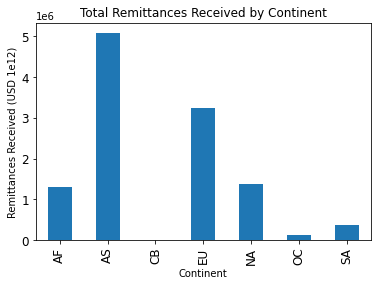

In [654]:
cont = in_global.groupby('continentcode').sum()
cont.total_rem.plot(kind='bar', title='Total Remittances Received by Continent', xlabel='Continent', ylabel='Remittances Received (USD 1e12)', fontsize=12)
cont.sort_values('total_rem', ascending=False)

## Total Remittances Received by Region
- ### Eastern Eu & Central Asia (ECA) | East Asia & Pacific (EAP) | South Asia (SAS) |
- ### Western Eu (WEU) | Latin Am & Caribbean (LAC) | Middle East & North Af (MENA) | North Am (NA) |
- ### Eastern & Southern Africa (ESAF) | West & Central Af (WCAF)
#### Source: UNICEF regional classifications (https://data.unicef.org/regionalclassifications/)

<AxesSubplot:title={'center':'Total Remittances Received by Region'}, xlabel='Region', ylabel='Remittances Received (USD 1e12)'>

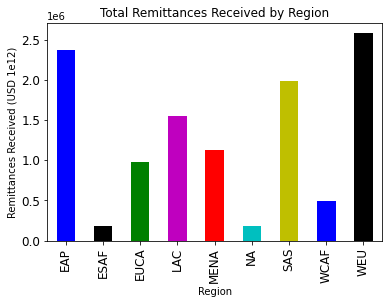

In [501]:
regions = in_global.groupby('region').sum()
regions.total_rem.plot(kind='bar', title='Total Remittances Received by Region', xlabel='Region', ylabel='Remittances Received (USD 1e12)', fontsize=12, color=['b','k','g','m','r','c','y'])


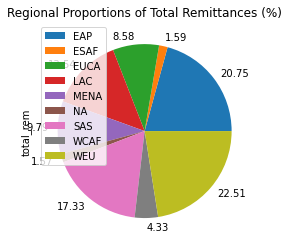

In [677]:
prop = 100 * regions.total_rem / sum(regions.total_rem[:])
prop.plot(kind='pie', title='Regional Proportions of Total Remittances (%)', labels=round(prop, 2), legend='best')
plt.legend(regions.index, loc='upper left')

## Remittances Received over Time

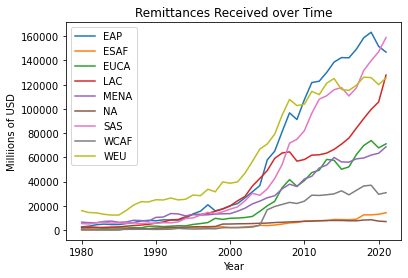

In [495]:
regions
regionss = regions.drop('remit_gdp', axis=1).drop('total_rem', axis=1)
regionss.iloc[0].plot(title='Remittances Received over Time', xlabel='Year', ylabel='Milliions of USD')
regionss.iloc[1].plot()
regionss.iloc[2].plot()
regionss.iloc[3].plot()
regionss.iloc[4].plot()
regionss.iloc[5].plot()
regionss.iloc[6].plot()
regionss.iloc[7].plot()
regionss.iloc[8].plot()
plt.legend(loc='best')

## Top 10 Receivers in 2020

In [519]:
top2020 = in_global.sort_values(2020, ascending=False)[2:]
top2020 = top2020[['Inflow Country', 2020]]
top2020[:15].plot(kind='bar')
plt.close()    # close fig
top2020.head(10)

,Inflow Country,2020
125,Mexico,42878.274907
152,Philippines,34913.342999
57,"Egypt, Arab Rep.",29602.900000
146,Pakistan,26108.000000
67,France,25141.879667
15,Bangladesh,21749.701161
72,Germany,17898.798739
141,Nigeria,17207.547306
208,Vietnam,17200.000000
200,Ukraine,15213.000000


## Top 10 Receivers in 2015

In [520]:
top2015 = in_global.sort_values(2015, ascending=False)[2:]
top2015 = top2015[['Inflow Country', 2015]]
top2015[:15].plot(kind='bar')
plt.close()    # close fig
top2015.head(10)

,Inflow Country,2015
152,Philippines,29799.395700
125,Mexico,26233.171803
67,France,24066.989837
141,Nigeria,20626.046924
146,Pakistan,19306.000000
57,"Egypt, Arab Rep.",18325.400000
72,Germany,15578.082899
15,Bangladesh,15295.536095
208,Vietnam,13000.000000
18,Belgium,10464.912315


### Ukraine probe

In [ ]:
inrem0.drop(['remit_gdp', 'total_rem'], axis=1).iloc[200].plot()
inrem0.xs('Ukraine')[2020]
plt.close('all')    # close fig

# Asia Analysis

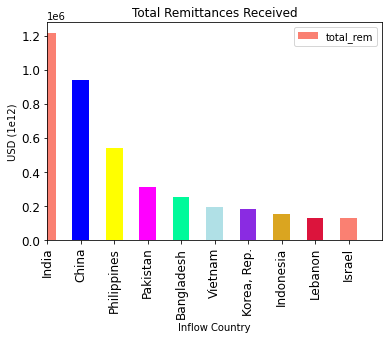

In [707]:
asia = in_global.loc[in_global.continentcode == 'AS']
asia = asia.sort_values('total_rem', ascending=False)
asiaa = asia.set_index('Inflow Country')
asiaa.total_rem[:10].plot(kind='bar', color=colors, title='Total Remittances Received', ylabel='USD (1e12)', fontsize=12)
l,r = plt.xlim()
l,r
plt.xlim([0,10])
plt.legend(loc='best')
colors=['salmon','blue','yellow','magenta','mediumspringgreen','powderblue','blueviolet','goldenrod','crimson']

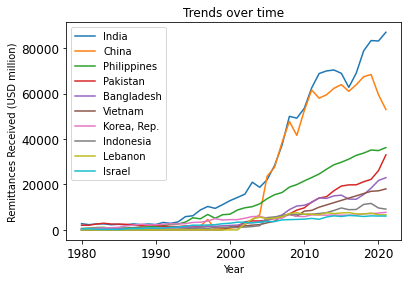

In [756]:
asiaaa = asiaa.drop(['remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
plt.axes(title='Trends over time', xlabel='Year', ylabel='Remittances Received (USD million)')
for i in range(10):
    asiaaa.iloc[i].plot(fontsize=12)
plt.legend(loc='best')

In [690]:
# trying to change axis labels of above graphs to respective countries
asia.total_rem[:8].plot(kind='bar')
plt.xlim([asia['Inflow Country'].iloc[0], asia['Inflow Country'].iloc[8]])
plt.close('all')

## East Asia & the Pacific Analysis

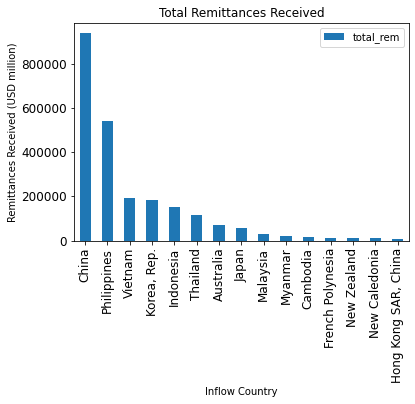

In [826]:
eap = in_global.loc[in_global.region == 'EAP']
eap = eap.sort_values('total_rem', ascending=False)
eap = eap.set_index('Inflow Country')
eap.total_rem[:15].plot(kind='bar', title='Total Remittances Received', ylabel='Remittances Received (USD million)', fontsize=12)
plt.legend(loc='best')

### EAP Trends over Time

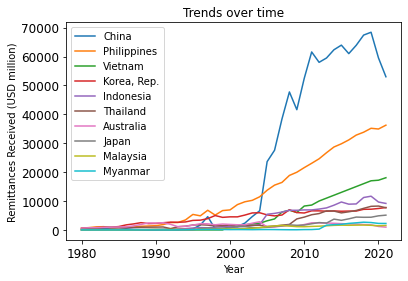

In [789]:
eapp = eap.drop(['remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
plt.axes(title='Trends over time', xlabel='Year', ylabel='Remittances Received (USD million)')
for i in range(10):
    eapp.iloc[i].plot(fontsize=12)
plt.legend(loc='best')

## South Asia Analysis

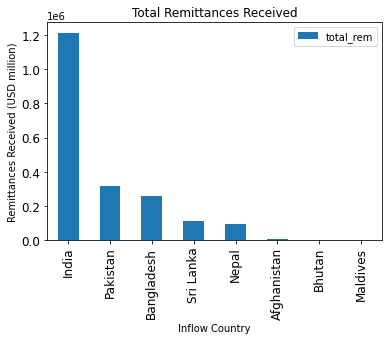

In [823]:
sas = in_global.loc[in_global.region == 'SAS']
sas = sas.sort_values('total_rem', ascending=False)
sas = sas.set_index('Inflow Country')
sas.total_rem[:15].plot(kind='bar', title='Total Remittances Received', ylabel='Remittances Received (USD million)', fontsize=12)
plt.legend(loc='best')

### SAS Trends over time

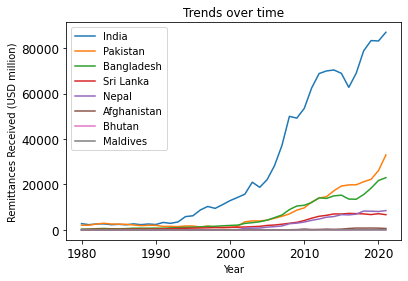

In [801]:
sass = sas.drop(['remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
plt.axes(title='Trends over time', xlabel='Year', ylabel='Remittances Received (USD million)')
for i in range(len(SAS)):
    sass.iloc[i].plot(fontsize=12)
plt.legend(loc='best')

## Eastern Europe & Central Asia Analysis

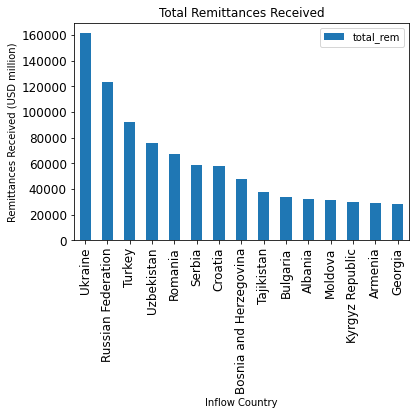

In [824]:
euca = in_global.loc[in_global.region == 'EUCA']
euca = euca.sort_values('total_rem', ascending=False)
euca = euca.set_index('Inflow Country')
euca.total_rem[:15].plot(kind='bar', title='Total Remittances Received', ylabel='Remittances Received (USD million)', fontsize=12)
plt.legend(loc='best')

### EUCA Trends over time

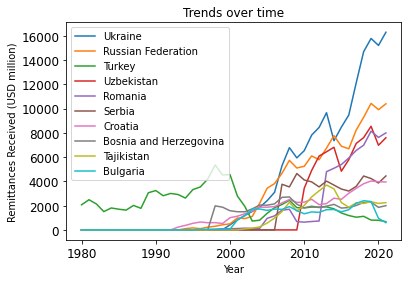

In [802]:
eucaa = euca.drop(['remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
plt.axes(title='Trends over time', xlabel='Year', ylabel='Remittances Received (USD million)')
for i in range(10):
    eucaa.iloc[i].plot(fontsize=12)
plt.legend(loc='best')

In [762]:
plt.close('all')
# overlap between senders and receivers
# what are the top migrant groups in SEDING countries

## Latin America & Caribbean

In [701]:
lac = in_global.loc[in_global.region == 'LAC']
lac = lac.sort_values('total_rem', ascending=False)
lac = lac.set_index('Inflow Country')

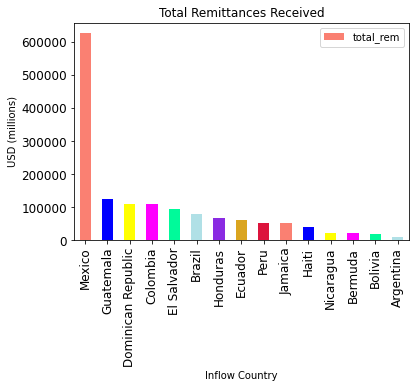

In [825]:
lac.total_rem[:15].plot(kind='bar', color=colors, title='Total Remittances Received', ylabel='USD (millions)', fontsize=12)
plt.legend(loc='best')

### LAC Trends over time

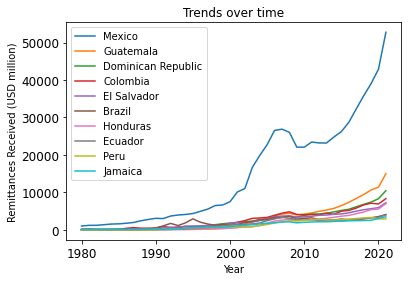

In [797]:
lacc = lac.drop(['remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
plt.axes(title='Trends over time', xlabel='Year', ylabel='Remittances Received (USD million)')
for i in range(10):
    lacc.iloc[i].plot(fontsize=12)
plt.legend(loc='best')

## Africa Analysis

<AxesSubplot:title={'center':'Total Remittances Received'}, xlabel='Inflow Country', ylabel='USD (millions)'>

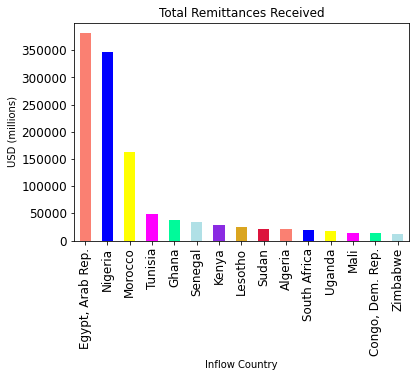

In [712]:
africa = in_global.loc[in_global.continentcode == 'AF']
africa = africa.sort_values('total_rem', ascending=False)
africa = africa.set_index('Inflow Country')
africa.total_rem[:15].plot(kind='bar', color=colors, title='Total Remittances Received', ylabel='USD (millions)', fontsize=12)

### Africa Trends over time

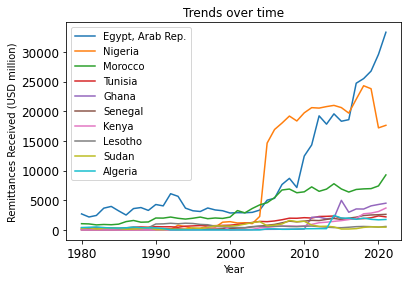

In [798]:
africaa = africa.drop(['remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
plt.axes(title='Trends over time', xlabel='Year', ylabel='Remittances Received (USD million)')
for i in range(10):
    africaa.iloc[i].plot(fontsize=12)
plt.legend(loc='best')

## West & Central Africa Analysis

<AxesSubplot:title={'center':'Total Remittances Received'}, xlabel='Inflow Country', ylabel='Remittances Received (USD million)'>

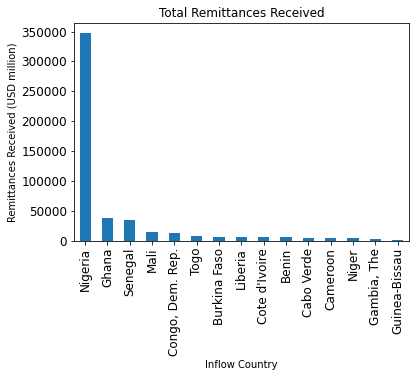

In [812]:
wcaf = in_global.loc[in_global.region == 'WCAF']
wcaf = wcaf.sort_values('total_rem', ascending=False)
wcaf = wcaf.set_index('Inflow Country')
wcaf.total_rem[:15].plot(kind='bar', title='Total Remittances Received', ylabel='Remittances Received (USD million)', fontsize=12)

### WCAF Trends over time

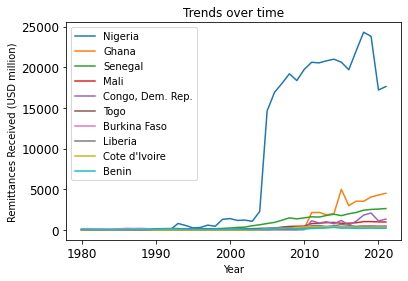

In [806]:
wcaff = wcaf.drop(['remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
plt.axes(title='Trends over time', xlabel='Year', ylabel='Remittances Received (USD million)')
for i in range(10):
    wcaff.iloc[i].plot(fontsize=12)
plt.legend(loc='best')

## East & Southern Africa Analysis

<AxesSubplot:title={'center':'Total Remittances Received'}, xlabel='Inflow Country', ylabel='Remittances Received (USD million)'>

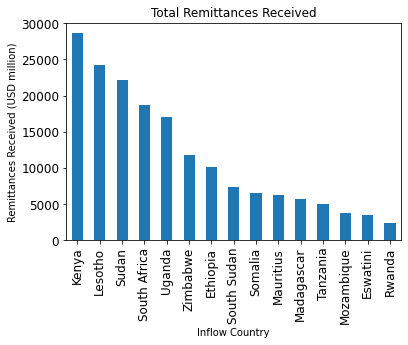

In [810]:
esaf = in_global.loc[in_global.region == 'ESAF']
esaf = esaf.sort_values('total_rem', ascending=False)
esaf = esaf.set_index('Inflow Country')
esaf.total_rem[:15].plot(kind='bar', title='Total Remittances Received', ylabel='Remittances Received (USD million)', fontsize=12)

### ESAF Trends over time

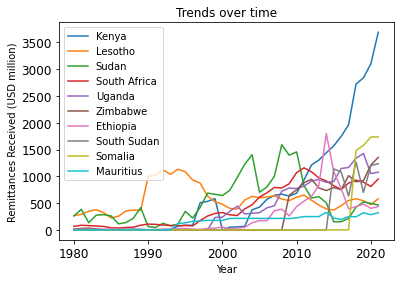

In [808]:
esaff = esaf.drop(['remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
plt.axes(title='Trends over time', xlabel='Year', ylabel='Remittances Received (USD million)')
for i in range(10):
    esaff.iloc[i].plot(fontsize=12)
plt.legend(loc='best')

### change units to billions rather than millions or 1e12